# Проект "Прогнозы и предсказания"

В рамках данного проекта необходимо для сети фитнес-центров «Культурист-датасаентист» провести анализ данных и подготовить план действий по удержанию клиентов.

В качестве исходных данных Заказчиком предоставлены данные, которые содержат данные на месяц до оттока и факт оттока на определённый месяц.

Исследование будем проводить в несколько шагов:
 - Загрузим данные
 - Проведем исследовательский анализ данных
   - Посмотрим на датасет: проверим, есть ли в нем отсутствующие признаки, изучим средние значения и стандартные отклонения
   - Посмотрим на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался
   - Построим столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток)
   - Построим матрицу корреляций и отобразим её
   
   
 - Построим модель прогнозирования оттока клиентов
   - Построим модель бинарной классификации клиентов, где целевой признак — факт оттока клиента в следующем месяце
    - Разобьем данные на обучающую и валидационную выборку функцией train_test_split()
    - Обучим модель на train-выборке двумя способами:
     - логистической регрессией
     - случайным лесом
    - Оценим метрики accuracy, precision и recall для обеих моделей на валидационной выборке. Сравним по ним модели. Определим, какая модель показала себя лучше на основании метрик
    
    
 - Сделаем кластеризацию клиентов
   - Стандартизируем данные
   - Построим матрицу расстояний функцией linkage() на стандартизованной матрице признаков и нарисуем дендрограмму. На основании полученного графика предположим, какое количество кластеров можно выделить
   - Обучим модель кластеризации на основании алгоритма K-Means и спрогнозируем кластеры клиентов
   - Посмотрим на средние значения признаков для кластеров
   - Построим распределения признаков для кластеров
   - Для каждого полученного кластера посчитаем долю оттока
 
В завершении напишем общий вывод и сформулируем рекомендации.

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Проведение-исследовательского-анализа-данных-(EDA)" data-toc-modified-id="Проведение-исследовательского-анализа-данных-(EDA)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Проведение исследовательского анализа данных (EDA)</a></span><ul class="toc-item"><li><span><a href="#Рассмотрение-датасета:-проверка-на-отсутствующие-признаки,-изучение-средних-значений-и-стандартных-отклонений" data-toc-modified-id="Рассмотрение-датасета:-проверка-на-отсутствующие-признаки,-изучение-средних-значений-и-стандартных-отклонений-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Рассмотрение датасета: проверка на отсутствующие признаки, изучение средних значений и стандартных отклонений</a></span><ul class="toc-item"><li><span><a href="#Столбец-gender---пол" data-toc-modified-id="Столбец-gender---пол-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Столбец <code>gender</code> - пол</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Столбец-near_location---проживание-или-работа-в-районе,-где-находится-фитнес-центр" data-toc-modified-id="Столбец-near_location---проживание-или-работа-в-районе,-где-находится-фитнес-центр-3.1.3"><span class="toc-item-num">3.1.3&nbsp;&nbsp;</span>Столбец <code>near_location</code> - проживание или работа в районе, где находится фитнес-центр</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.1.4"><span class="toc-item-num">3.1.4&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Столбец-partner---сотрудник-компании-партнёра-клуба" data-toc-modified-id="Столбец-partner---сотрудник-компании-партнёра-клуба-3.1.5"><span class="toc-item-num">3.1.5&nbsp;&nbsp;</span>Столбец <code>partner</code> - сотрудник компании-партнёра клуба</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.1.6"><span class="toc-item-num">3.1.6&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Столбец-promo_friends---факт-первоначальной-записи-в-рамках-акции-«приведи-друга»" data-toc-modified-id="Столбец-promo_friends---факт-первоначальной-записи-в-рамках-акции-«приведи-друга»-3.1.7"><span class="toc-item-num">3.1.7&nbsp;&nbsp;</span>Столбец <code>promo_friends</code> - факт первоначальной записи в рамках акции «приведи друга»</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.1.8"><span class="toc-item-num">3.1.8&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Столбец-phone---наличие-контактного-телефона" data-toc-modified-id="Столбец-phone---наличие-контактного-телефона-3.1.9"><span class="toc-item-num">3.1.9&nbsp;&nbsp;</span>Столбец <code>phone</code> - наличие контактного телефона</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.1.10"><span class="toc-item-num">3.1.10&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Столбец-contract_period---длительность-текущего-действующего-абонемента" data-toc-modified-id="Столбец-contract_period---длительность-текущего-действующего-абонемента-3.1.11"><span class="toc-item-num">3.1.11&nbsp;&nbsp;</span>Столбец <code>contract_period</code> - длительность текущего действующего абонемента</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.1.12"><span class="toc-item-num">3.1.12&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Столбец-group_visits---факт-посещения-групповых-занятий" data-toc-modified-id="Столбец-group_visits---факт-посещения-групповых-занятий-3.1.13"><span class="toc-item-num">3.1.13&nbsp;&nbsp;</span>Столбец <code>group_visits</code> - факт посещения групповых занятий</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.1.14"><span class="toc-item-num">3.1.14&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Столбец-age---возраст" data-toc-modified-id="Столбец-age---возраст-3.1.15"><span class="toc-item-num">3.1.15&nbsp;&nbsp;</span>Столбец <code>age</code> - возраст</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.1.16"><span class="toc-item-num">3.1.16&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Столбец-avg_additional_charges_total---суммарная-выручка-от-других-услуг-фитнес-центра:-кафе,-спорт-товары,-косметический-и-массажный-салон" data-toc-modified-id="Столбец-avg_additional_charges_total---суммарная-выручка-от-других-услуг-фитнес-центра:-кафе,-спорт-товары,-косметический-и-массажный-салон-3.1.17"><span class="toc-item-num">3.1.17&nbsp;&nbsp;</span>Столбец <code>avg_additional_charges_total</code> - суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.1.18"><span class="toc-item-num">3.1.18&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Столбец-month_to_end_contract---срок-до-окончания-текущего-действующего-абонемента-(в-месяцах)" data-toc-modified-id="Столбец-month_to_end_contract---срок-до-окончания-текущего-действующего-абонемента-(в-месяцах)-3.1.19"><span class="toc-item-num">3.1.19&nbsp;&nbsp;</span>Столбец <code>month_to_end_contract</code> - срок до окончания текущего действующего абонемента (в месяцах)</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.1.20"><span class="toc-item-num">3.1.20&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Столбец-lifetime----время-с-момента-первого-обращения-в-фитнес-центр-(в-месяцах)" data-toc-modified-id="Столбец-lifetime----время-с-момента-первого-обращения-в-фитнес-центр-(в-месяцах)-3.1.21"><span class="toc-item-num">3.1.21&nbsp;&nbsp;</span>Столбец <code>lifetime</code> -  время с момента первого обращения в фитнес-центр (в месяцах)</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.1.22"><span class="toc-item-num">3.1.22&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Столбец-avg_class_frequency_total----средняя-частота-посещений-в-неделю-за-все-время-с-начала-действия-абонемента" data-toc-modified-id="Столбец-avg_class_frequency_total----средняя-частота-посещений-в-неделю-за-все-время-с-начала-действия-абонемента-3.1.23"><span class="toc-item-num">3.1.23&nbsp;&nbsp;</span>Столбец <code>avg_class_frequency_total</code> -  средняя частота посещений в неделю за все время с начала действия абонемента</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.1.24"><span class="toc-item-num">3.1.24&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Столбец-avg_class_frequency_current_month---средняя-частота-посещений-в-неделю-за-предыдущий-месяц" data-toc-modified-id="Столбец-avg_class_frequency_current_month---средняя-частота-посещений-в-неделю-за-предыдущий-месяц-3.1.25"><span class="toc-item-num">3.1.25&nbsp;&nbsp;</span>Столбец <code>avg_class_frequency_current_month</code> - средняя частота посещений в неделю за предыдущий месяц</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.1.26"><span class="toc-item-num">3.1.26&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Столбец-churn---факт-оттока-в-текущем-месяце" data-toc-modified-id="Столбец-churn---факт-оттока-в-текущем-месяце-3.1.27"><span class="toc-item-num">3.1.27&nbsp;&nbsp;</span>Столбец <code>churn</code> - факт оттока в текущем месяце</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.1.28"><span class="toc-item-num">3.1.28&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Рассмотрение-средних-значений-признаков-в-двух-группах-—-тех,-кто-ушел-в-отток-и-тех,-кто-остался" data-toc-modified-id="Рассмотрение-средних-значений-признаков-в-двух-группах-—-тех,-кто-ушел-в-отток-и-тех,-кто-остался-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Рассмотрение средних значений признаков в двух группах — тех, кто ушел в отток и тех, кто остался</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Построение-столбчатых-гистограмм-и-распределения-признаков-для-тех,-кто-ушёл-(отток)-и-тех,-кто-остался-(не-попали-в-отток)" data-toc-modified-id="Построение-столбчатых-гистограмм-и-распределения-признаков-для-тех,-кто-ушёл-(отток)-и-тех,-кто-остался-(не-попали-в-отток)-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Построение столбчатых гистограмм и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток)</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Построение-матрицы-корреляций" data-toc-modified-id="Построение-матрицы-корреляций-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Построение матрицы корреляций</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Построение-модели-прогнозирования-оттока-клиентов" data-toc-modified-id="Построение-модели-прогнозирования-оттока-клиентов-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Построение модели прогнозирования оттока клиентов</a></span><ul class="toc-item"><li><span><a href="#Разделение-данных-на-обучающую-и-валидационную-выборку" data-toc-modified-id="Разделение-данных-на-обучающую-и-валидационную-выборку-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Разделение данных на обучающую и валидационную выборку</a></span></li><li><span><a href="#Обучение-модели-на-train-выборке-двумя-способами:-логистической-регрессией,-случайным-лесом." data-toc-modified-id="Обучение-модели-на-train-выборке-двумя-способами:-логистической-регрессией,-случайным-лесом.-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Обучение модели на train-выборке двумя способами: логистической регрессией, случайным лесом.</a></span><ul class="toc-item"><li><span><a href="#Логистическая-регресссия" data-toc-modified-id="Логистическая-регресссия-5.2.1"><span class="toc-item-num">5.2.1&nbsp;&nbsp;</span>Логистическая регресссия</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-5.2.2"><span class="toc-item-num">5.2.2&nbsp;&nbsp;</span>Случайный лес</a></span></li></ul></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Кластеризация-клиентов" data-toc-modified-id="Кластеризация-клиентов-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Кластеризация клиентов</a></span><ul class="toc-item"><li><span><a href="#Стандартизация-данных" data-toc-modified-id="Стандартизация-данных-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Стандартизация данных</a></span></li><li><span><a href="#Матрица-расстояний" data-toc-modified-id="Матрица-расстояний-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Матрица расстояний</a></span></li><li><span><a href="#Модель-кластеризации" data-toc-modified-id="Модель-кластеризации-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>Модель кластеризации</a></span></li><li><span><a href="#Средние-значения-признаков-для-кластеров" data-toc-modified-id="Средние-значения-признаков-для-кластеров-7.4"><span class="toc-item-num">7.4&nbsp;&nbsp;</span>Средние значения признаков для кластеров</a></span></li><li><span><a href="#Распределения-признаков-для-кластеров" data-toc-modified-id="Распределения-признаков-для-кластеров-7.5"><span class="toc-item-num">7.5&nbsp;&nbsp;</span>Распределения признаков для кластеров</a></span></li><li><span><a href="#Доля-оттока-для-каждого-кластера" data-toc-modified-id="Доля-оттока-для-каждого-кластера-7.6"><span class="toc-item-num">7.6&nbsp;&nbsp;</span>Доля оттока для каждого кластера</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Общий-Вывод" data-toc-modified-id="Общий-Вывод-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Общий Вывод</a></span><ul class="toc-item"><li><span><a href="#Чек-лист-доработок-v2" data-toc-modified-id="Чек-лист-доработок-v2-9.1"><span class="toc-item-num">9.1&nbsp;&nbsp;</span>Чек-лист доработок v2</a></span></li></ul></li></ul></div>

## Загрузка данных

In [1]:
# импортируем библиотеку pandas
import pandas as pd

# добавим настройку
pd.set_option('max_colwidth', 400)

# импортируем библиотеку numpy
import numpy as np

# импортируем библиотеку math
import math as mth

# импортируем библиотеку datetime
import datetime as dt

# для создания графиков и гистограмм импортируем библиотеку matplotlib
from matplotlib import pyplot as plt

# импортируем библиотеку seaborn
import seaborn as sns

# импортируем библиотеку plotly
from plotly import graph_objects as go
import plotly.express as px

#импортируем библиотеку warnings, чтобы скрыть возникающие предупреждения
import warnings
warnings.filterwarnings('ignore')

import warnings 
warnings.simplefilter('ignore')

from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

# импортируем itertools

import itertools 

# импортируем библиотеку sklearn и функции для обучения

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [3]:
# получим общую информацию о таблице

print('Таблица gym_churn:')
display(gym_churn.head())
    
print()
    
print('Общая информация о таблице gym_churn:')
gym_churn.info()

Таблица gym_churn:


,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0



Общая информация о таблице gym_churn:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
Near_Location                        4000 non-null int64
Partner                              4000 non-null int64
Promo_friends                        4000 non-null int64
Phone                                4000 non-null int64
Contract_period                      4000 non-null int64
Group_visits                         4000 non-null int64
Age                                  4000 non-null int64
Avg_additional_charges_total         4000 non-null float64
Month_to_end_contract                4000 non-null float64
Lifetime                             4000 non-null int64
Avg_class_frequency_total            4000 non-null float64
Avg_class_frequency_current_month    4000 non-null float64
Churn                                4000 non-null int64
dtypes: float64(4), int64(10)
memory usage: 437.

In [4]:
# приведём названия к нижнему регистру

gym_churn.rename(columns = {'gender': 'gender', 'Near_Location': 'near_location', 
                           'Partner': 'partner', 'Promo_friends': 'promo_friends',
                           'Phone': 'phone','Contract_period': 'contract_period',
                           'Group_visits': 'group_visits','Age': 'age',
                           'Avg_additional_charges_total': 'avg_additional_charges_total',
                            'Month_to_end_contract': 'month_to_end_contract',
                           'Lifetime': 'lifetime', 'Avg_class_frequency_total': 'avg_class_frequency_total',
                           'Avg_class_frequency_current_month': 'avg_class_frequency_current_month',
                            'Churn': 'churn'}, inplace = True)

In [5]:
# получим общую информацию о таблице после корректировки

print('Таблица gym_churn:')
display(gym_churn.head())
    
print()
    
print('Общая информация о таблице gym_churn:')
gym_churn.info()

Таблица gym_churn:


,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0



Общая информация о таблице gym_churn:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
near_location                        4000 non-null int64
partner                              4000 non-null int64
promo_friends                        4000 non-null int64
phone                                4000 non-null int64
contract_period                      4000 non-null int64
group_visits                         4000 non-null int64
age                                  4000 non-null int64
avg_additional_charges_total         4000 non-null float64
month_to_end_contract                4000 non-null float64
lifetime                             4000 non-null int64
avg_class_frequency_total            4000 non-null float64
avg_class_frequency_current_month    4000 non-null float64
churn                                4000 non-null int64
dtypes: float64(4), int64(10)
memory usage: 437.

## Вывод

На данном шаге откроем файл с исходными данными и изучим общую информацию по таблице.

Для удобства приведём названия к нижнему регистру.

Набор данных включает 14 столбцов:
 
- Данные клиента за предыдущий до проверки факта оттока месяц:
 - `gender` — пол
 - `near_Location` — проживание или работа в районе, где находится фитнес-центр
 - `partner` — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);
 - `promo_friends` — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента)
 - `phone` — наличие контактного телефона
 - `age` — возраст
 - `lifetime` — время с момента первого обращения в фитнес-центр (в месяцах)


- Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:
 - `contract_period` — длительность текущего действующего абонемента (месяц, 3 месяца, 6 месяцев, год)
 - `month_to_end_contract` — срок до окончания текущего действующего абонемента (в месяцах)
 - `group_visits` — факт посещения групповых занятий
 - `avg_class_frequency_total` — средняя частота посещений в неделю за все время с начала действия абонемента
 - `avg_class_frequency_current_month` — средняя частота посещений в неделю за предыдущий месяц
 - `avg_additional_charges_total` — суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон
 
 - `churn` — факт оттока в текущем месяце

## Проведение исследовательского анализа данных (EDA)

In [6]:
# посчитаем количество дубликатов в таблице

print('Количество дубликатов в таблице gym_churn:', gym_churn.duplicated().sum())

Количество дубликатов в таблице gym_churn: 0


### Рассмотрение датасета: проверка на отсутствующие признаки, изучение средних значений и стандартных отклонений

#### Столбец `gender` - пол

In [7]:
#получим суммарное количество пропусков для столбца

print('Cуммарное количество пропусков для столбца gender:')
print(gym_churn['gender'].isnull().sum())

Cуммарное количество пропусков для столбца gender:
0


In [8]:
#выделим уникальные значения в столбце

print('Уникальные значения в столбце gender:')
print(gym_churn['gender'].value_counts())

Уникальные значения в столбце gender:
1    2041
0    1959
Name: gender, dtype: int64


#### Вывод

Cуммарное количество пропусков для столбца `gender` равно нулю, пропущенных значений нет. Данные отображаются корректно, подозрительных значений не наблюдается, правки вносить не будем. Тип данных int64 не меняем.

Признак `gender` числовой (бинарный) и представлен в двух вариантах: 1 и 0:
 - Пол 1 = 2041
 - Пол 0 = 1959
 
Т.к. по количеству значений 1 превышает 0, предположим, что 1 - женский пол, 0 - мужской.

#### Столбец `near_location` - проживание или работа в районе, где находится фитнес-центр

In [9]:
#получим суммарное количество пропусков для столбца

print('Cуммарное количество пропусков для столбца near_location:')
print(gym_churn['near_location'].isnull().sum())

Cуммарное количество пропусков для столбца near_location:
0


In [10]:
#выделим уникальные значения в столбце

print('Уникальные значения в столбце near_location:')
print(gym_churn['near_location'].value_counts())

Уникальные значения в столбце near_location:
1    3381
0     619
Name: near_location, dtype: int64


#### Вывод

Cуммарное количество пропусков для столбца `near_location` равно нулю, пропущенных значений нет. Данные отображаются корректно, подозрительных значений не наблюдается, правки вносить не будем. Тип данных int64 не меняем.

Признак `near_location` числовой (бинарный) и представлен в двух вариантах: 1 и 0:
 - Вариант проживания/работы 1 = 3381
 - Вариант проживания/работы 0 = 619
 
Считаем, что 1 - человек проживает или работает в районе, где находится фитнес-центр, 0 - человек проживает или работает НЕ в районе, где находится фитнес-центр. В соответвии со значениями больше людей, которые выбирают фитнес-клуб ближе к работе или месту проживания (что ожидаемо).

#### Столбец `partner` - сотрудник компании-партнёра клуба

In [11]:
#получим суммарное количество пропусков для столбца

print('Cуммарное количество пропусков для столбца partner:')
print(gym_churn['partner'].isnull().sum())

Cуммарное количество пропусков для столбца partner:
0


In [12]:
#выделим уникальные значения в столбце

print('Уникальные значения в столбце partner:')
print(gym_churn['partner'].value_counts())

Уникальные значения в столбце partner:
0    2053
1    1947
Name: partner, dtype: int64


#### Вывод

Cуммарное количество пропусков для столбца `partner` равно нулю, пропущенных значений нет. Данные отображаются корректно, подозрительных значений не наблюдается, правки вносить не будем. Тип данных int64 не меняем.

Признак `partner` числовой (бинарный) и представлен в двух вариантах: 1 и 0:
 - Вариант 0 = 2053
 - Вариант 1 = 1947

Считаем, что 1 - сотрудник компании-партнёра клуба, 0 - НЕ сотрудник компании-партнёра клуба. НЕ сотрудников компании-партнёра клуба больше, чем сотрудников.

#### Столбец `promo_friends` - факт первоначальной записи в рамках акции «приведи друга»

In [13]:
#получим суммарное количество пропусков для столбца

print('Cуммарное количество пропусков для столбца promo_friends:')
print(gym_churn['promo_friends'].isnull().sum())

Cуммарное количество пропусков для столбца promo_friends:
0


In [14]:
#выделим уникальные значения в столбце

print('Уникальные значения в столбце promo_friends:')
print(gym_churn['promo_friends'].value_counts())

Уникальные значения в столбце promo_friends:
0    2766
1    1234
Name: promo_friends, dtype: int64


#### Вывод

Cуммарное количество пропусков для столбца `promo_friends` равно нулю, пропущенных значений нет. Данные отображаются корректно, подозрительных значений не наблюдается, правки вносить не будем. Тип данных int64 не меняем.

Признак `promo_friends` числовой (бинарный) и представлен в двух вариантах: 1 и 0:
 - Вариант записи в рамках акции "Приведи друга" 0 = 2766
 - Вариант записи в рамках акции "Приведи друга" 1 = 1234
 
Считаем, что 1 - человек пришел по акции "Приведи друга", 0 - человек пришел не по акции "Приведи друга".

Число значений для 1 меньше, чем для 0 почти в два раза, т.е. всё-таки люди приходят в основном не по акции "Приведи друга" (также ожидаемо, ведь спортзал - это про личную мотивацию в первую очередь).

#### Столбец `phone` - наличие контактного телефона

In [15]:
#получим суммарное количество пропусков для столбца

print('Cуммарное количество пропусков для столбца phone:')
print(gym_churn['phone'].isnull().sum())

Cуммарное количество пропусков для столбца phone:
0


In [16]:
#выделим уникальные значения в столбце

print('Уникальные значения в столбце phone:')
print(gym_churn['phone'].value_counts())

Уникальные значения в столбце phone:
1    3614
0     386
Name: phone, dtype: int64


#### Вывод

Cуммарное количество пропусков для столбца `phone` равно нулю, пропущенных значений нет. Данные отображаются корректно, подозрительных значений не наблюдается, правки вносить не будем. Тип данных int64 не меняем.

Признак `phone` числовой (бинарный) и представлен в двух вариантах: 1 и 0:
 - Вариант записи телефона 1 = 3614
 - Вариант записи телефона 0 = 386
 
Считаем, что 1 - есть данные по номеру телефона, 0 - нет данных по номеру телефона.

Число значений для 1 больше, чем для 0, т.е. в основном клиенты сообщают свой номер телефона при оформлении карты клуба.

#### Столбец `contract_period` - длительность текущего действующего абонемента

In [17]:
#получим суммарное количество пропусков для столбца

print('Cуммарное количество пропусков для столбца contract_period:')
print(gym_churn['contract_period'].isnull().sum())

Cуммарное количество пропусков для столбца contract_period:
0


In [18]:
#выделим уникальные значения в столбце

print('Уникальные значения в столбце contract_period:')
print(gym_churn['contract_period'].value_counts())

Уникальные значения в столбце contract_period:
1     2207
12     960
6      833
Name: contract_period, dtype: int64


#### Вывод

Cуммарное количество пропусков для столбца `contract_period` равно нулю, пропущенных значений нет. Данные отображаются корректно, подозрительных значений не наблюдается, правки вносить не будем. Тип данных int64 не меняем.

Признак `contract_period` числовой и представлен в трёх вариантах: 
 - 1 месяц = 2207
 - 12 месяцев = 960
 - 6 месяцев = 833

Больше всего значений для длительности абонемента 1 месяц. По всей видимости, люди хотят сначала протестировать и не платить сразу за продолжительный период.

#### Столбец `group_visits` - факт посещения групповых занятий

In [19]:
#получим суммарное количество пропусков для столбца

print('Cуммарное количество пропусков для столбца group_visits:')
print(gym_churn['group_visits'].isnull().sum())

Cуммарное количество пропусков для столбца group_visits:
0


In [20]:
#выделим уникальные значения в столбце

print('Уникальные значения в столбце group_visits:')
print(gym_churn['group_visits'].value_counts())

Уникальные значения в столбце group_visits:
0    2351
1    1649
Name: group_visits, dtype: int64


#### Вывод

Cуммарное количество пропусков для столбца `group_visits` равно нулю, пропущенных значений нет. Данные отображаются корректно, подозрительных значений не наблюдается, правки вносить не будем. Тип данных int64 не меняем.

Признак `group_visits` числовой (бинарный) и представлен в двух вариантах: 
 - Вариант 0 = 2351
 - Вариант 1 = 1649

Считаем, что 1 - человек посещал групповые занятия, 0 - человек не посещал групповые занятия.

Число значений для варианта 1 больше, чем для 0, т.е. люди не особо стремятся на групповые занятия.

#### Столбец `age` - возраст

In [21]:
#получим суммарное количество пропусков для столбца

print('Cуммарное количество пропусков для столбца age:')
print(gym_churn['age'].isnull().sum())

Cуммарное количество пропусков для столбца age:
0


In [22]:
#выделим уникальные значения в столбце

print('Уникальные значения в столбце age:')
print(gym_churn['age'].value_counts())

Уникальные значения в столбце age:
29    468
30    457
28    447
31    434
27    378
32    364
26    300
33    253
25    231
34    174
24    148
35     98
23     82
36     48
22     33
37     29
21     24
20     14
38     10
39      3
19      2
18      2
41      1
Name: age, dtype: int64


In [23]:
#получим числовое описание данных (список характерных значений) для столбца

print('Числовое описание данных для столбца age:')
print(gym_churn['age'].describe())

Числовое описание данных для столбца age:
count    4000.000000
mean       29.184250
std         3.258367
min        18.000000
25%        27.000000
50%        29.000000
75%        31.000000
max        41.000000
Name: age, dtype: float64


#### Вывод

Cуммарное количество пропусков для столбца `age` равно нулю, пропущенных значений нет. Данные отображаются корректно, подозрительных значений не наблюдается, правки вносить не будем. Тип данных int64 не меняем.

Признак `age` числовой и представлен в нескольких вариантах. В соответствии с числовым описанием:

 - Максимальный возраст в наборе данных - 41 год
 - Минимальный возраст в наборе данных - 18 лет
 - Среднее значение 29 лет
 - Медианное значение - 29 лет

Число значений для медианного(и среднего) возраста 29 лет наибольшее, а для возраста 41 год - наименьшее.

#### Столбец `avg_additional_charges_total` - суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон

In [24]:
#получим суммарное количество пропусков для столбца

print('Cуммарное количество пропусков для столбца avg_additional_charges_total:')
print(gym_churn['avg_additional_charges_total'].isnull().sum())

Cуммарное количество пропусков для столбца avg_additional_charges_total:
0


In [25]:
#выделим уникальные значения в столбце

print('Уникальные значения в столбце avg_additional_charges_total:')
print(gym_churn['avg_additional_charges_total'].value_counts().head(10))

Уникальные значения в столбце avg_additional_charges_total:
135.756722    1
97.623617     1
82.487277     1
17.911351     1
74.882931     1
160.369376    1
141.220086    1
236.814091    1
118.700688    1
48.658008     1
Name: avg_additional_charges_total, dtype: int64


In [26]:
#получим числовое описание данных (список характерных значений) для столбца

print('Числовое описание данных для столбца avg_additional_charges_total:')
print(gym_churn['avg_additional_charges_total'].describe())

Числовое описание данных для столбца avg_additional_charges_total:
count    4000.000000
mean      146.943728
std        96.355602
min         0.148205
25%        68.868830
50%       136.220159
75%       210.949625
max       552.590740
Name: avg_additional_charges_total, dtype: float64


#### Вывод

Cуммарное количество пропусков для столбца `avg_additional_charges_total` равно нулю, пропущенных значений нет. Данные отображаются корректно, подозрительных значений не наблюдается, правки вносить не будем. Тип данных float64 не меняем.

Признак `avg_additional_charges_total` числовой и представлен в нескольких вариантах. В соответствии с числовым описанием:

 - Максимальная суммарная выручка от других услуг фитнес-центра = 552
 - Минимальная суммарная выручка от других услуг фитнес-центра = 0.14
 - Среднее значение суммарной выручки от других услуг фитнес-центра = 146
 - Медианное значение суммарной выручки от других услуг фитнес-центра = 136

#### Столбец `month_to_end_contract` - срок до окончания текущего действующего абонемента (в месяцах)

In [27]:
#получим суммарное количество пропусков для столбца

print('Cуммарное количество пропусков для столбца month_to_end_contract:')
print(gym_churn['month_to_end_contract'].isnull().sum())

Cуммарное количество пропусков для столбца month_to_end_contract:
0


In [28]:
#выделим уникальные значения в столбце

print('Уникальные значения в столбце month_to_end_contract:')
print(gym_churn['month_to_end_contract'].value_counts())

Уникальные значения в столбце month_to_end_contract:
1.0     2207
6.0      645
12.0     524
11.0     181
5.0      130
10.0      82
9.0       73
4.0       58
8.0       38
7.0       25
3.0       23
2.0       14
Name: month_to_end_contract, dtype: int64


In [29]:
#получим числовое описание данных (список характерных значений) для столбца

print('Числовое описание данных для столбца month_to_end_contract:')
print(gym_churn['month_to_end_contract'].describe())

Числовое описание данных для столбца month_to_end_contract:
count    4000.000000
mean        4.322750
std         4.191297
min         1.000000
25%         1.000000
50%         1.000000
75%         6.000000
max        12.000000
Name: month_to_end_contract, dtype: float64


#### Вывод

Cуммарное количество пропусков для столбца `month_to_end_contract` равно нулю, пропущенных значений нет. Данные отображаются корректно, подозрительных значений не наблюдается, правки вносить не будем. Тип данных float64 не меняем.

Признак `month_to_end_contract` числовой и представлен в нескольких вариантах. В соответствии с числовым описанием:

 - Максимальный срок до окончания текущего действующего абонемента = 12 месяцев
 - Минимальный срок до окончания текущего действующего абонемента = 1 месяц
 - Средний срок до окончания текущего действующего абонемента = 4 месяца
 - Медианное значение срока до окончания текущего действующего абонемента = 1 месяц

#### Столбец `lifetime` -  время с момента первого обращения в фитнес-центр (в месяцах)

In [30]:
#получим суммарное количество пропусков для столбца

print('Cуммарное количество пропусков для столбца lifetime:')
print(gym_churn['lifetime'].isnull().sum())

Cуммарное количество пропусков для столбца lifetime:
0


In [31]:
#выделим уникальные значения в столбце

print('Уникальные значения в столбце lifetime:')
print(gym_churn['lifetime'].value_counts())

Уникальные значения в столбце lifetime:
1     843
2     610
3     490
0     487
4     383
5     273
6     220
7     167
8     111
9     100
10     76
12     53
11     48
13     28
14     24
15     24
16     15
17     11
19      7
20      7
18      7
21      5
24      2
22      2
26      2
23      2
29      1
27      1
31      1
Name: lifetime, dtype: int64


In [32]:
#получим числовое описание данных (список характерных значений) для столбца

print('Числовое описание данных для столбца lifetime:')
print(gym_churn['lifetime'].describe())

Числовое описание данных для столбца lifetime:
count    4000.000000
mean        3.724750
std         3.749267
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max        31.000000
Name: lifetime, dtype: float64


#### Вывод

Cуммарное количество пропусков для столбца `lifetime` равно нулю, пропущенных значений нет. Данные отображаются корректно, подозрительных значений не наблюдается, правки вносить не будем. Тип данных int64 не меняем.

Признак `lifetime` числовой и представлен в нескольких вариантах. В соответствии с числовым описанием:

 - Максимальное время с момента первого обращения в фитнес-центр = 31 месяц
 - Минимальное время с момента первого обращения в фитнес-центр = 0 месяцев
 - Среднее время с момента первого обращения в фитнес-центр = 3.7 месяцев
 - Медианное время с момента первого обращения в фитнес-центр = 3 месяца

#### Столбец `avg_class_frequency_total` -  средняя частота посещений в неделю за все время с начала действия абонемента

In [33]:
#получим суммарное количество пропусков для столбца

print('Cуммарное количество пропусков для столбца avg_class_frequency_total:')
print(gym_churn['avg_class_frequency_total'].isnull().sum())

Cуммарное количество пропусков для столбца avg_class_frequency_total:
0


In [34]:
#выделим уникальные значения в столбце

print('Уникальные значения в столбце avg_class_frequency_total:')
print(gym_churn['avg_class_frequency_total'].value_counts().head(10))

Уникальные значения в столбце avg_class_frequency_total:
0.000000    88
3.071431     1
3.275314     1
2.687575     1
0.751450     1
2.789898     1
0.752629     1
4.248851     1
2.379836     1
2.668372     1
Name: avg_class_frequency_total, dtype: int64


In [35]:
#получим числовое описание данных (список характерных значений) для столбца

print('Числовое описание данных для столбца avg_class_frequency_total:')
print(gym_churn['avg_class_frequency_total'].describe())

Числовое описание данных для столбца avg_class_frequency_total:
count    4000.000000
mean        1.879020
std         0.972245
min         0.000000
25%         1.180875
50%         1.832768
75%         2.536078
max         6.023668
Name: avg_class_frequency_total, dtype: float64


#### Вывод

Cуммарное количество пропусков для столбца `avg_class_frequency_total` равно нулю, пропущенных значений нет. Данные отображаются корректно, подозрительных значений не наблюдается, правки вносить не будем. Тип данных float64 не меняем.

Признак `avg_class_frequency_total` числовой и представлен в нескольких вариантах. В соответствии с числовым описанием:

 - Максимальная средняя частота посещений в неделю за все время с начала действия абонемента = 6
 - Минимальная средняя частота посещений в неделю за все время с начала действия абонемента = 0
 - Среднее значение частоты посещений в неделю за все время с начала действия абонемента срок до окончания текущего действующего абонемента = 1.87
 - Медианное значение частоты посещений в неделю за все время с начала действия абонемента срок до окончания текущего действующего абонемента = 1.83

#### Столбец `avg_class_frequency_current_month` - средняя частота посещений в неделю за предыдущий месяц

In [36]:
#получим суммарное количество пропусков для столбца
print('Cуммарное количество пропусков для столбца avg_class_frequency_current_month:')
print(gym_churn['avg_class_frequency_current_month'].isnull().sum())

Cуммарное количество пропусков для столбца avg_class_frequency_current_month:
0


In [37]:
#выделим уникальные значения в столбце
print('Уникальные значения в столбце avg_class_frequency_current_month:')
print(gym_churn['avg_class_frequency_current_month'].value_counts().head(10))

Уникальные значения в столбце avg_class_frequency_current_month:
0.000000    181
2.038709      1
1.202066      1
2.981590      1
2.618891      1
2.093760      1
2.480858      1
3.762328      1
2.854688      1
1.608635      1
Name: avg_class_frequency_current_month, dtype: int64


In [38]:
#получим числовое описание данных (список характерных значений) для столбца

print('Числовое описание данных для столбца avg_class_frequency_current_month:')
print(gym_churn['avg_class_frequency_current_month'].describe())

Числовое описание данных для столбца avg_class_frequency_current_month:
count    4000.000000
mean        1.767052
std         1.052906
min         0.000000
25%         0.963003
50%         1.719574
75%         2.510336
max         6.146783
Name: avg_class_frequency_current_month, dtype: float64


#### Вывод

Cуммарное количество пропусков для столбца `avg_class_frequency_current_month` равно нулю, пропущенных значений нет. Данные отображаются корректно, подозрительных значений не наблюдается, правки вносить не будем. Тип данных float64 не меняем.

Признак `avg_class_frequency_current_month` числовой и представлен в нескольких вариантах. В соответствии с числовым описанием:

 - Максимальная средняя частота посещений в неделю за предыдущий месяц = 6.1
 - Минимальная средняя частота посещений в неделю за предыдущий месяц = 0
 - Среднее значение частоты посещений в неделю за предыдущий месяц = 1.76
 - Медианное значение частоты посещений в неделю за предыдущий месяц  = 1.71

#### Столбец `churn` - факт оттока в текущем месяце

In [39]:
#получим суммарное количество пропусков для столбца
print('Cуммарное количество пропусков для столбца churn:')
print(gym_churn['churn'].isnull().sum())

Cуммарное количество пропусков для столбца churn:
0


In [40]:
#выделим уникальные значения в столбце
print('Уникальные значения в столбце churn:')
print(gym_churn['churn'].value_counts())

Уникальные значения в столбце churn:
0    2939
1    1061
Name: churn, dtype: int64


#### Вывод

Cуммарное количество пропусков для столбца `churn` равно нулю, пропущенных значений нет. Данные отображаются корректно, подозрительных значений не наблюдается, правки вносить не будем. Тип данных int64 не меняем.

Признак `churn` числовой (бинарный) и представлен в двух вариантах: 
 - Вариант 0 = 2939
 - Вариант 1 = 1061

Считаем, что 1 - отток произошел, 0 - человек продолжает посещать спортзал.

Число значений для варианта 0 больше, чем для 1, т.е. люди всё-таки продолжают в основном ходить в спортзал.

### Рассмотрение средних значений признаков в двух группах — тех, кто ушел в отток и тех, кто остался

In [41]:
# рассчитаем средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался

gym_churn.groupby('churn').mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


### Вывод

Рассчитаем средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался. Воспользуемся методом groupby(). Средние значения для тех, кто остался, превышают значения для тех, кто ушел.

### Построение столбчатых гистограмм и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток)

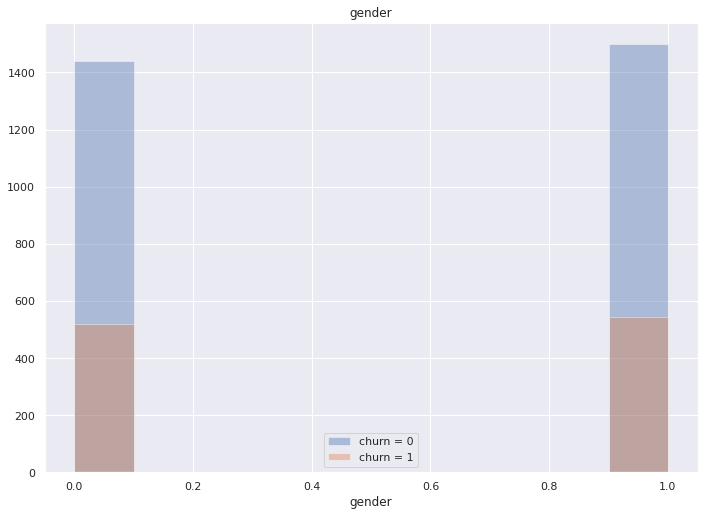

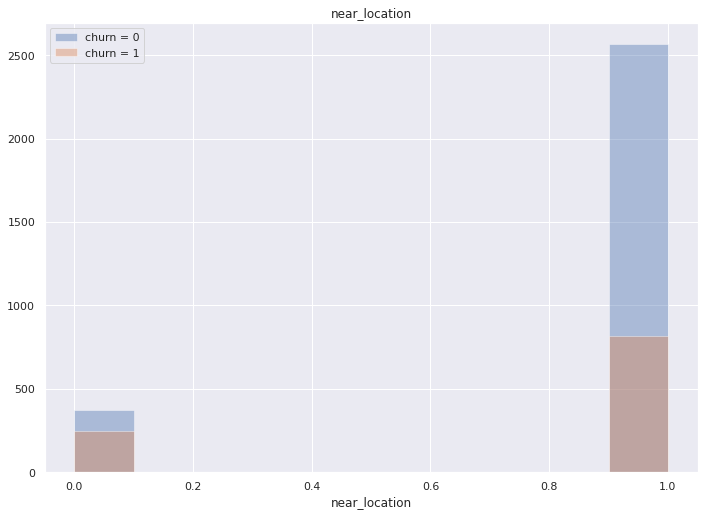

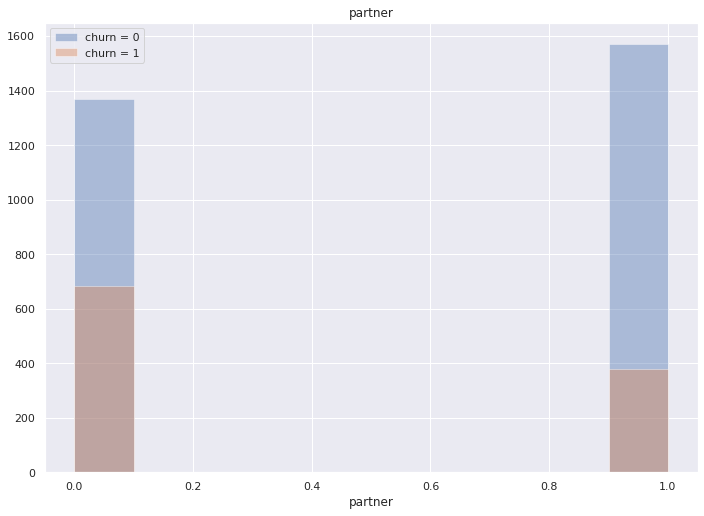

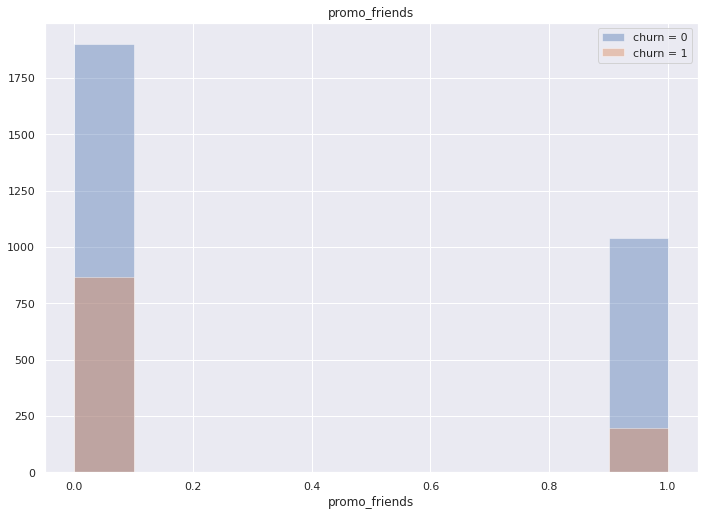

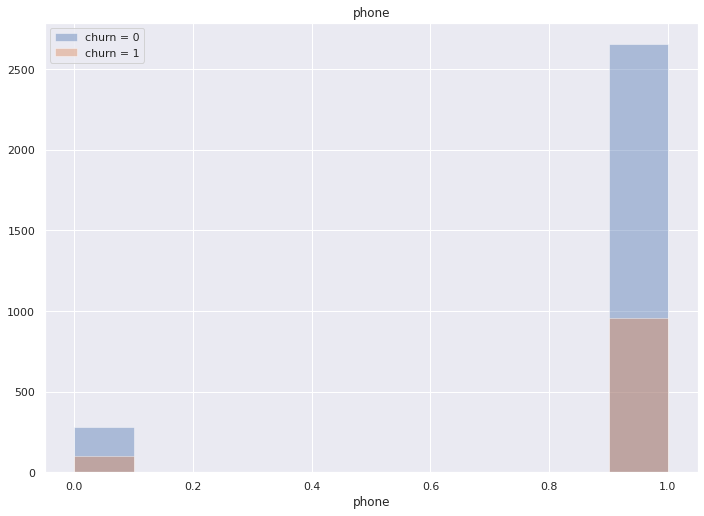

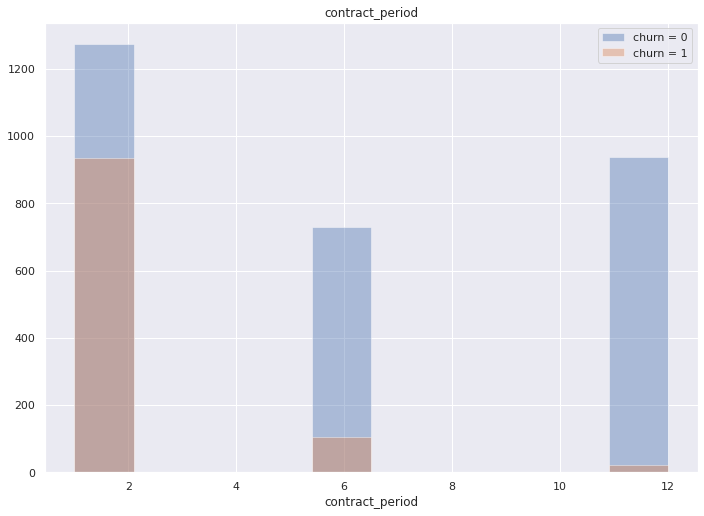

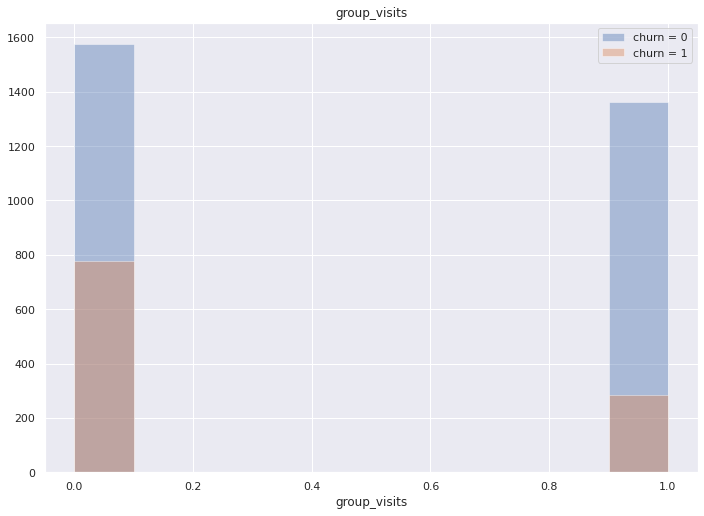

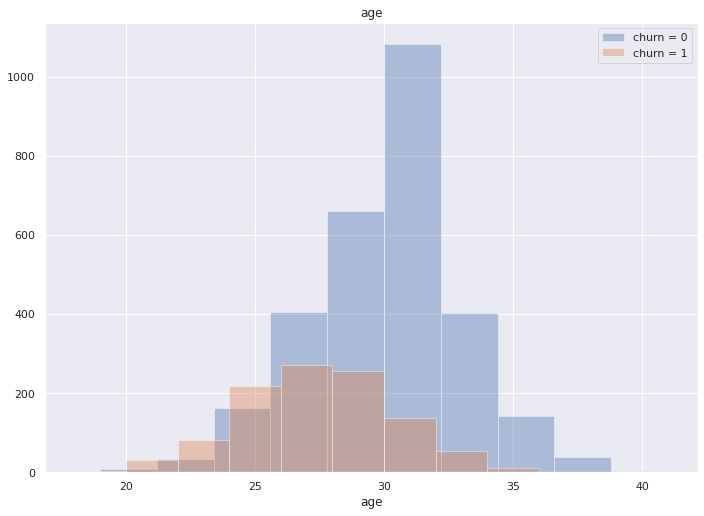

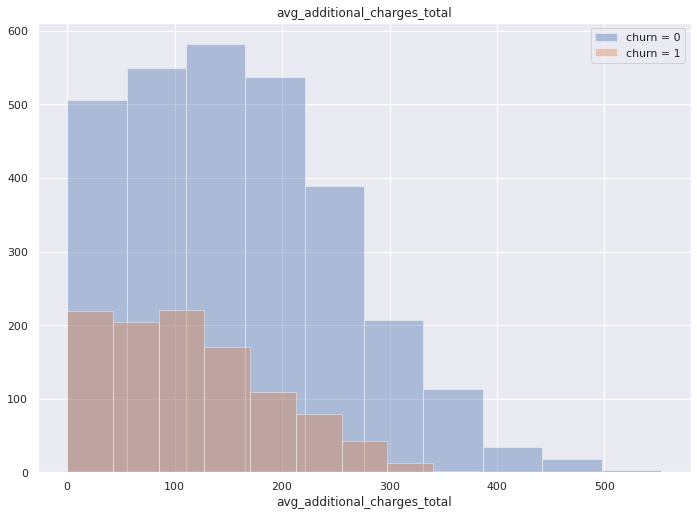

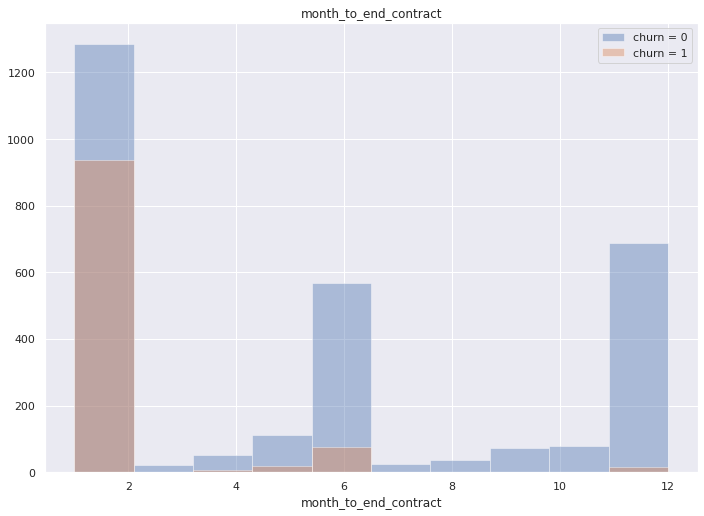

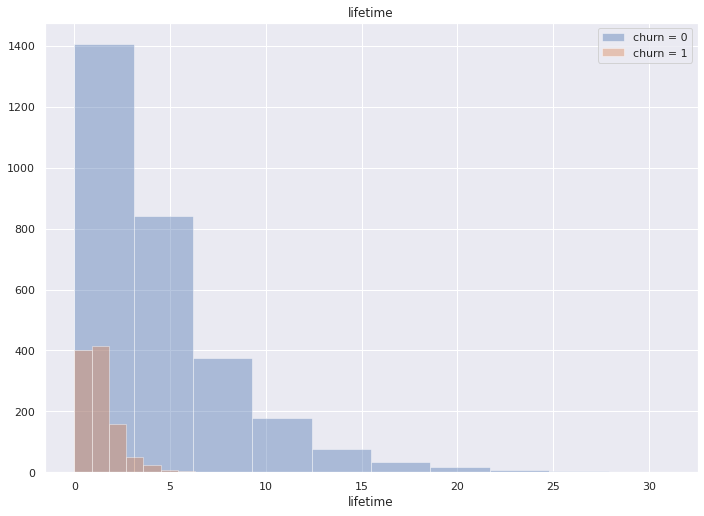

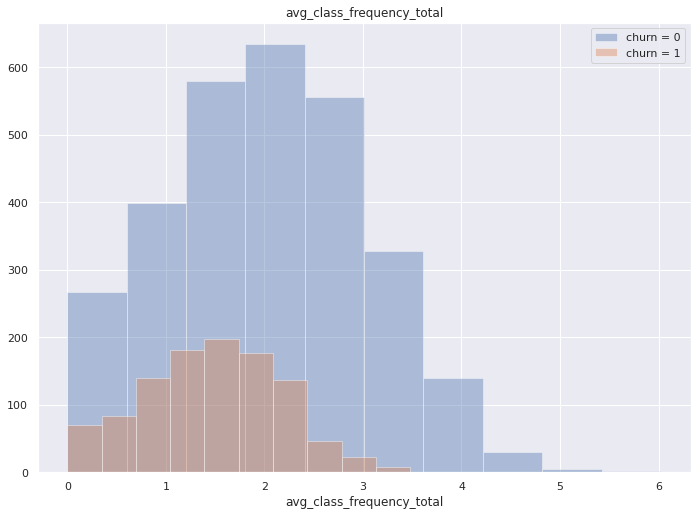

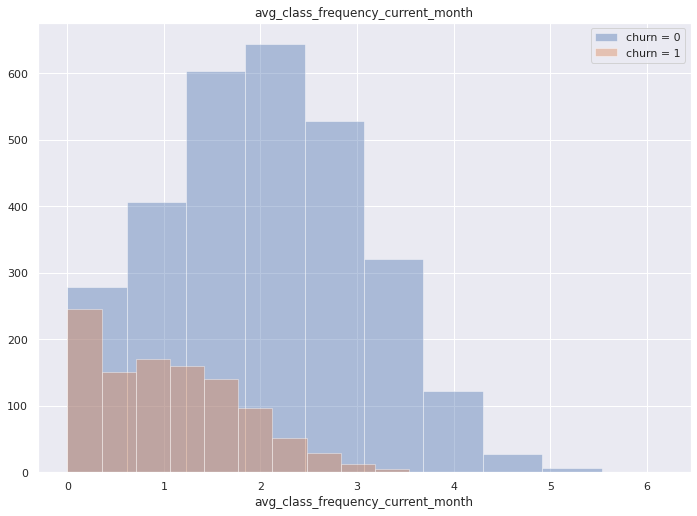

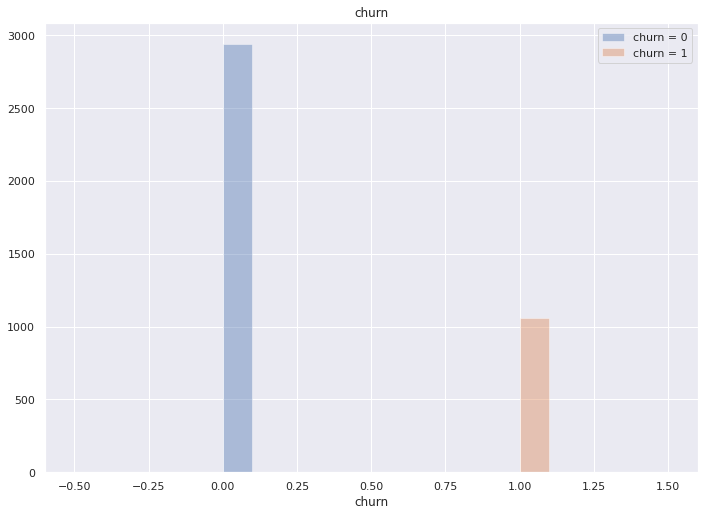

In [42]:
# построим столбчатые гистограммы

sns.set(rc={'figure.figsize':(11.7,8.27)})
 
def feat_hist(dataframe, column_to_group, column_to_plot):
 
    for c in column_to_plot:
        for cl in dataframe[column_to_group].unique():
 
            sns.distplot(dataframe[dataframe[column_to_group]==cl][c], 
                         label='{} = {}'.format(column_to_group, str(cl)), bins = 10, kde= False)
            
        
        plt.title(c)
        plt.legend()
        plt.show()

feat_hist(gym_churn, 'churn', gym_churn.columns)

### Вывод

Построим столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток). Напишем функцию для построения гистограмм.


Для признака `gender`количество тех, кто ушел в отток, и для пола 0, и для пола 1 примерно одинаково. То есть отток от пола не зависит. 

Для признака `near_location` количество тех, кто ушел в отток, для варианта 1 превышает количество для варианта 0, но для варианта 0 и количество тех, кто остался, тоже невелико по сравнению с вариантом 1. То есть отток больше для варианта, когда клиент живет/работает НЕ рядом с клубом. 

Для признака `partner` отток НЕ сотрудников компании-партнёра клуба (вариант 0) больше, чем сотрудников.

Для признака `promo_friends` количество тех, кто ушел в отток, больше для варианта 0, но и значений для 0 больше. Люди приходят в основном не по акции "Приведи друга", но и отток при этом большой.

Для признака `phone` распределение похоже на `near_location`: количество тех, кто ушел в отток, для варианта 1 превышает количество для варианта 0, но и по количеству значений тех, кто остался, 1 значительно превышает 0. Т.е. среди тех, кто оставляет телефон (а их большинство) и отток тоже большой.

Для признака `contract_period` больше всего отток среди тех, кто брал абонемент на 1 месяц. А вот наименьший отток среди тех, кто берет абонемент на год, это самые стабильные клиенты.

Для признака `group_visits` отток среди тех, кто НЕ посещает групповые занятия больше, чем среди тех, кто посещает.

Для признака `age` распределения похожи на нормальные, и судя по графику, возраст тех, кто ушел в отток, в среднем около 27-28 лет. 

Для признака `avg_additional_charges_total` распределения похожи между собой, но не похожи на нормальные. Суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон схожа и для тех, кто ушел в отток, и для тех, кто остался.

Для признака `month_to_end_contract` распределение похоже на `contract_period` (что ожидаемо), тк. чем больше период, тем больше срок до окончания, и тем меньше отток.

Для признака `lifetime` количество тех, кто ушел в отток значительно меньше тех, кто остался.

Для признаков `avg_class_frequency_total`и `avg_class_frequency_current_month` распределения схожи, количество тех, кто ушел в отток значительно меньше тех, кто остался. 

### Построение матрицы корреляций

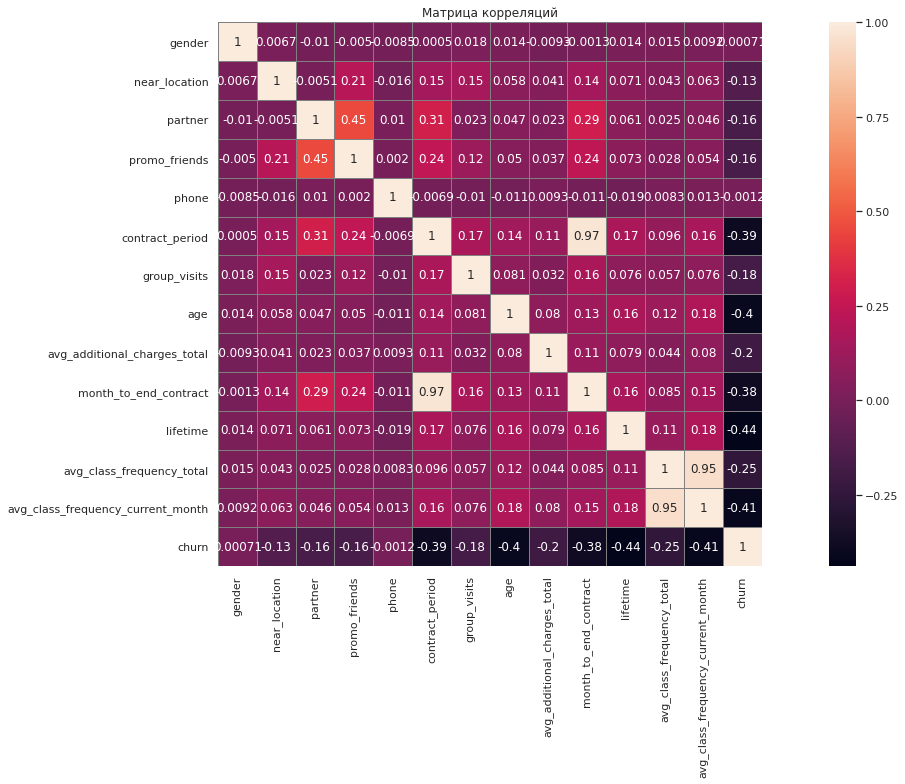

In [43]:
# корреляционная матрица
corr_m = gym_churn.corr()

# нарисуем heatmap
sns.set(style='white')
plt.figure(figsize=(24, 10))
plt.title('Матрица корреляций')
sns.heatmap(corr_m, square = True, annot = True, linewidths=1, linecolor='gray')
plt.show()

In [44]:
# удалим по одному из пары коррелирующих признаков

gym_churn_new = gym_churn.drop(['month_to_end_contract', 'avg_class_frequency_current_month'], axis = 1)

In [45]:
gym_churn_new.head()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,lifetime,avg_class_frequency_total,churn
0,1,1,1,1,0,6,1,29,14.227470,3,0.020398,0
1,0,1,0,0,1,12,1,31,113.202938,7,1.922936,0
2,0,1,1,0,1,1,0,28,129.448479,2,1.859098,0
3,0,1,1,1,1,12,1,33,62.669863,2,3.205633,0
4,1,1,1,1,1,1,0,26,198.362265,3,1.113884,0


### Вывод

Построим корреляционную матрицу числовых признаков набора данных. Визуализируем её методом heatmap().

Судя по матрице корреляции, нет признаков, которые коррелируют с целевой переменной более, чем на 0.9 по модулю. Зато есть две пары скоррелированных признаков: `contract_period` и `month_to_end_contract`(коэффициент корреляции 0.97) и `avg_class_frequency_total` и `avg_class_frequency_current_month` (коэффициент корреляции 0.95). Удалили по одному из пары коррелирующих признаков.

## Вывод

Провели исследовательский анализ данных.


- Посмотрели на датасет: проверили, есть ли в нем отсутствующие признаки, изучили средние значения и стандартные отклонения. Cуммарное количество пропусков для столбцов равно нулю, пропущенных значений нет. Дубликаты в наборе данных отсутствуют. Данные отображаются корректно, подозрительных значений не наблюдается, правки не вносили. Тип данных не меняли. Рассмотрели все столбцы/признаки по отдельности. В каждом столбце по 4000 значений. Все признаки числовые.
 
 
  - Признак `gender` представлен в двух вариантах: 1 и 0:
    - Пол 1 = 2041
    - Пол 0 = 1959
    - Т.к. по количеству значений 1 превышает 0, предположим, что 1 - женский пол, 0 - мужской.
  
  
  - Признак `near_location` представлен в двух вариантах: 1 и 0:
    - Вариант проживания/работы 1 = 3381
    - Вариант проживания/работы 0 = 619
    - Считаем, что 1 - человек проживает или работает в районе, где находится фитнес-центр, 0 - человек проживает или работает НЕ в районе, где находится фитнес-центр. В соответвии со значениями больше людей, которые выбирают фитнес-клуб ближе к работе или месту проживания (что ожидаемо).
  
  
   - Признак `partner` представлен в двух вариантах: 1 и 0:
     - Вариант 0 = 2053
     - Вариант 1 = 1947
     - Считаем, что 1 - сотрудник компании-партнёра клуба, 0 - НЕ сотрудник компании-партнёра клуба. НЕ сотрудников компании-партнёра клуба больше, чем сотрудников.
  

  - Признак `promo_friends` представлен в двух вариантах: 1 и 0:
    - Вариант записи в рамках акции "Приведи друга" 0 = 2766
    - Вариант записи в рамках акции "Приведи друга" 1 = 1234
    - Считаем, что 1 - человек пришел по акции "Приведи друга", 0 - человек пришел не по акции "Приведи друга". Число значений для 1 меньше, чем для 0 почти в два раза, т.е. всё-таки люди приходят в основном не по акции "Приведи друга" (также ожидаемо, ведь спортзал - это про личную мотивацию в первую очередь).
  
  
   - Признак `phone` представлен в двух вариантах: 1 и 0:
     - Вариант записи телефона 1 = 3614
     - Вариант записи телефона 0 = 386
     - Считаем, что 1 - есть данные по номеру телефона, 0 - нет данных по номеру телефона. Число значений для 1 больше, чем для 0, т.е. в основном клиенты сообщают свой номер телефона при оформлении карты клуба.
   

   - Признак `contract_period` представлен в трёх вариантах: 
     - 1 месяц = 2207
     - 12 месяцев = 960
     - 6 месяцев = 833
     - Больше всего значений для длительности абонемента 1 месяц. По всей видимости, люди хотят сначала протестировать и не платить сразу за продолжительный период.


   - Признак `group_visits` представлен в двух вариантах: 
     - Вариант 0 = 2351
     - Вариант 1 = 1649
     - Считаем, что 1 - человек посещал групповые занятия, 0 - человек не посещал групповые занятия. Число значений для варианта 1 больше, чем для 0, т.е. люди не особо стремятся на групповые занятия.


   - Признак `age` представлен в нескольких вариантах. В соответствии с числовым описанием:
     - Максимальный возраст в наборе данных - 41 год
     - Минимальный возраст в наборе данных - 18 лет
     - Среднее значение 29 лет
     - Медианное значение - 29 лет
     - Число значений для медианного(и среднего) возраста 29 лет наибольшее, а для возраста 41 год - наименьшее.


   - Признак `avg_additional_charges_total` представлен в нескольких вариантах. В соответствии с числовым описанием:
     - Максимальная суммарная выручка от других услуг фитнес-центра = 552
     - Минимальная суммарная выручка от других услуг фитнес-центра = 0.14
     - Среднее значение суммарной выручки от других услуг фитнес-центра = 146
     - Медианное значение суммарной выручки от других услуг фитнес-центра = 136


   - Признак `month_to_end_contract` представлен в нескольких вариантах. В соответствии с числовым описанием:
     - Максимальный срок до окончания текущего действующего абонемента = 12 месяцев
     - Минимальный срок до окончания текущего действующего абонемента = 1 месяц
     - Средний срок до окончания текущего действующего абонемента = 4 месяца
     - Медианное значение срока до окончания текущего действующего абонемента = 1 месяц

 
  - Признак `lifetime` представлен в нескольких вариантах. В соответствии с числовым описанием:
    - Максимальное время с момента первого обращения в фитнес-центр = 31 месяц
    - Минимальное время с момента первого обращения в фитнес-центр = 0 месяцев
    - Среднее время с момента первого обращения в фитнес-центр = 3.7 месяцев
    - Медианное время с момента первого обращения в фитнес-центр = 3 месяца


  - Признак `avg_class_frequency_total` представлен в нескольких вариантах. В соответствии с числовым описанием:
    - Максимальная средняя частота посещений в неделю за все время с начала действия абонемента = 6
    - Минимальная средняя частота посещений в неделю за все время с начала действия абонемента = 0
    - Среднее значение частоты посещений в неделю за все время с начала действия абонемента срок до окончания текущего действующего абонемента = 1.87
    - Медианное значение частоты посещений в неделю за все время с начала действия абонемента срок до окончания текущего действующего абонемента = 1. 83


  - Признак `avg_class_frequency_current_month`представлен в нескольких вариантах. В соответствии с числовым описанием:
    - Максимальная средняя частота посещений в неделю за предыдущий месяц = 6.1
    - Минимальная средняя частота посещений в неделю за предыдущий месяц = 0
    - Среднее значение частоты посещений в неделю за предыдущий месяц = 1.76
    - Медианное значение частоты посещений в неделю за предыдущий месяц  = 1.71


  - Признак `churn` представлен в двух вариантах: 
    - Вариант 0 = 2939
    - Вариант 1 = 1061
    - Считаем, что 1 - отток произошел, 0 - человек продолжает посещать спортзал.
    - Число значений для варианта 0 больше, чем для 1, т.е. люди всё-таки продолжают в основном ходить в спортзал.


- Посмотрели на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался. Средние значения для тех, кто остался, превышают значения для тех, кто ушел.


- Построили столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток);


- Построили корреляционную матрицу числовых признаков набора данных. Визуализировали её методом heatmap(). Судя по матрице корреляции, нет признаков, которые коррелируют с целевой переменной более, чем на 0.9 по модулю. Зато есть две пары скоррелированных признаков: `contract_period` и `month_to_end_contract`(коэффициент корреляции 0.97) и `avg_class_frequency_total` и `avg_class_frequency_current_month` (коэффициент корреляции 0.95).


## Построение модели прогнозирования оттока клиентов

### Разделение данных на обучающую и валидационную выборку

In [46]:
# разделим данные на признаки (матрица X) и целевую переменную (y)

X = gym_churn_new.drop('churn', axis = 1)
y = gym_churn_new['churn']

# разобьем данные на обучающую и валидационную выборку функцией train_test_split()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Обучение модели на train-выборке двумя способами: логистической регрессией, случайным лесом.

In [47]:
# определим функцию, которая будет выводить метрики

def print_all_metrics(y_true, y_pred, y_proba, title='Метрики классификации'):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))
    print('\tF1: {:.2f}'.format(f1_score(y_true, y_pred)))
    print('\tROC_AUC: {:.2f}'.format(roc_auc_score(y_true, y_proba)))

#### Логистическая регресссия

In [48]:
# зададим алгоритм для модели

lr_model = LogisticRegression(random_state=0) 

# обучим модель

lr_model.fit(X_train, y_train)

# воспользуемся уже обученной моделью, чтобы сделать прогнозы

lr_predictions = lr_model.predict(X_test) 
lr_probabilities = lr_model.predict_proba(X_test)[:, 1]

# выведем все метрики

print_all_metrics(
    y_test,
    lr_predictions,
    lr_probabilities,
    title='Метрики для модели логистической регрессии:',
    )

Метрики для модели логистической регрессии:
	Accuracy: 0.88
	Precision: 0.76
	Recall: 0.77
	F1: 0.77
	ROC_AUC: 0.95


#### Случайный лес

In [49]:
# зададим алгоритм для новой модели на основе алгоритма случайного леса

rf_model = RandomForestClassifier(n_estimators=100, random_state=0)

# обучим модель случайного леса
rf_model.fit(X_train, y_train)

# воспользуемся уже обученной моделью, чтобы сделать прогнозы

rf_predictions = rf_model.predict(X_test)
rf_probabilities = rf_model.predict_proba(X_test)[:, 1]

# выведем все метрики

print_all_metrics(
    y_test,
    rf_predictions,
    rf_probabilities,
    title='Метрики для модели случайного леса:',
    )

Метрики для модели случайного леса:
	Accuracy: 0.89
	Precision: 0.78
	Recall: 0.77
	F1: 0.78
	ROC_AUC: 0.94


## Вывод

Построили модель бинарной классификации клиентов.

Разбили данные на обучающую и валидационную выборку функцией train_test_split(). Обучили модель на train-выборке двумя способами: логистической регрессией, случайным лесом.

Оценили метрики accuracy, precision и recall, F1, ROC_AUC для обеих моделей на валидационной выборке. Сравнили по ним модели. Модель случайного леса показала себя лучше на основании метрик (за исключением ROC_AUC - для этой метрики показатель для модели логистической регрессии выше).

 - Метрики для модели логистической регрессии:
   - Accuracy: 0.88
   - Precision: 0.76
   - Recall: 0.77
   - F1: 0.77
   - ROC_AUC: 0.95
   
   
 - Метрики для модели случайного леса:
   - Accuracy: 0.89
   - Precision: 0.78
   - Recall: 0.77
   - F1: 0.78
   - ROC_AUC: 0.94

## Кластеризация клиентов

### Стандартизация данных

In [50]:
# создадим объект класса scaler (стандартизатор)

sc = StandardScaler()

# обучим scaler на трансформированной выборке методом fit

x_sc = sc.fit_transform(X) 

### Матрица расстояний

In [51]:
# передадим стандартизированную таблицу в качестве параметра функции linkage()

linked = linkage(x_sc, method = 'ward') 

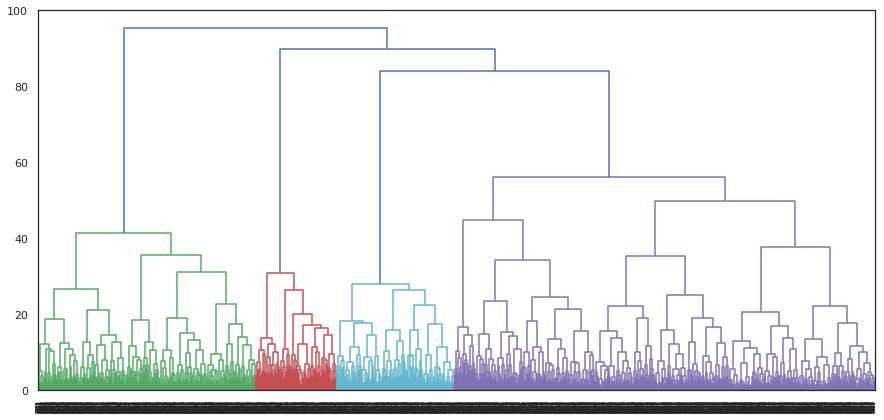

In [52]:
# визуализируем таблицу «связок» между объектами как дендрограмму

plt.figure(figsize=(15, 7))  
dendrogram(linked, orientation='top')
plt.show() 

### Модель кластеризации 

In [53]:
# зададим модель k_means с количеством кластеров 5
km = KMeans(n_clusters = 5, random_state=0)

# спрогнозируем кластеры для наблюдений
labels = km.fit_predict(x_sc)

# сохраним метки кластера в поле датасета
gym_churn_new['cluster_km'] = labels

# посчитаем метрику силуэта для кластеризации
print('Silhouette_score: {:.2f}'.format(silhouette_score(x_sc, labels)))

Silhouette_score: 0.14


### Средние значения признаков для кластеров

In [54]:
# рассчитаем средние значения признаков для кластеров

gym_churn_new.groupby('cluster_km').mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,lifetime,avg_class_frequency_total,churn
cluster_km,,,,,,,,,,,,
0,0.499109,0.000000,0.488414,0.076649,1.0,3.032086,0.235294,28.721925,137.540009,3.060606,1.770413,0.399287
1,0.488571,0.995238,0.955238,0.892381,1.0,7.660952,0.458095,29.543810,155.861428,4.380952,1.978963,0.120952
2,0.505300,1.000000,0.238516,0.059187,1.0,2.819788,0.000000,28.770318,143.383993,3.343640,1.800647,0.381625
3,0.544202,1.000000,0.250287,0.079219,1.0,4.528129,1.000000,29.536165,148.088897,3.761194,1.941342,0.200918
4,0.523316,0.862694,0.471503,0.305699,0.0,4.777202,0.427461,29.297927,144.208179,3.940415,1.854211,0.266839


### Распределения признаков для кластеров

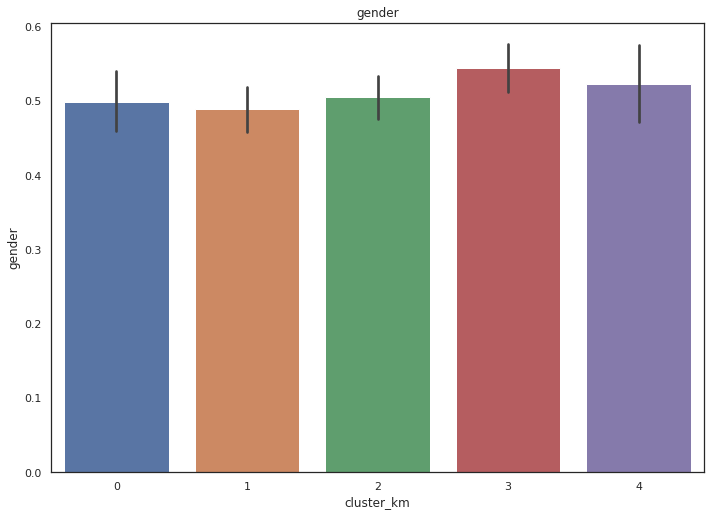

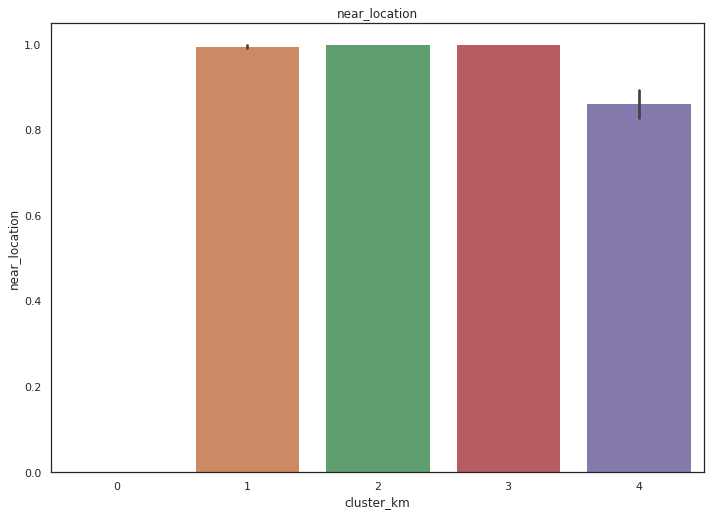

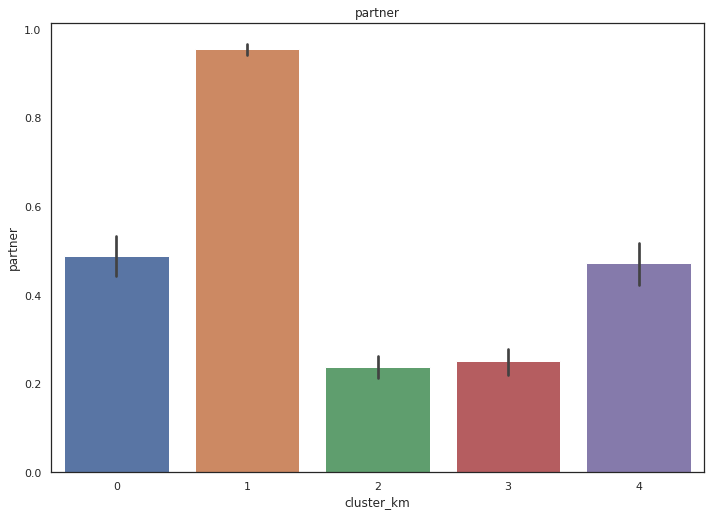

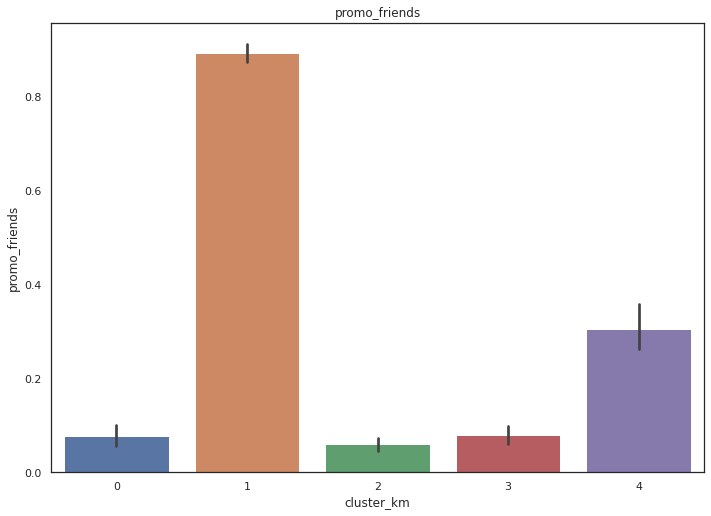

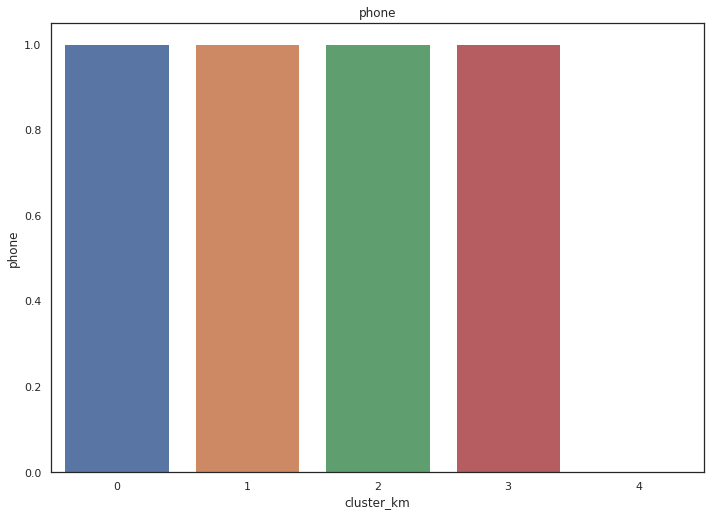

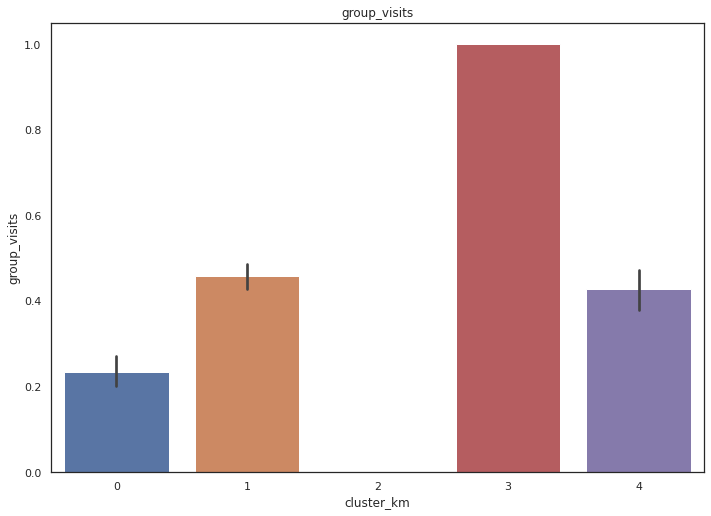

In [55]:
# построим столбчатые диаграммы

for item in ('gender', 'near_location', 'partner', 'promo_friends', 'phone', 'group_visits'):
    sns.barplot(x='cluster_km', y=item, data=gym_churn_new)
    plt.title(item)
    plt.show()

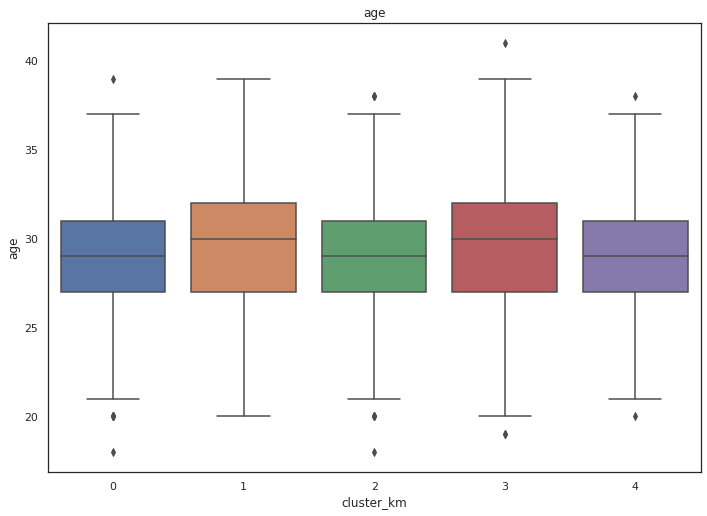

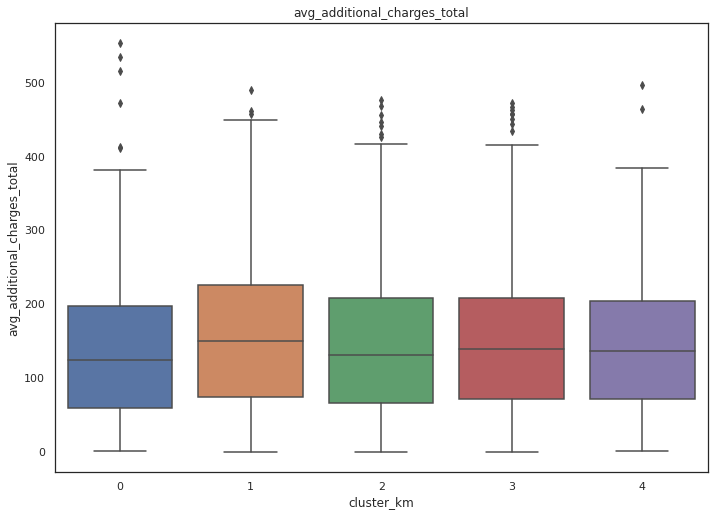

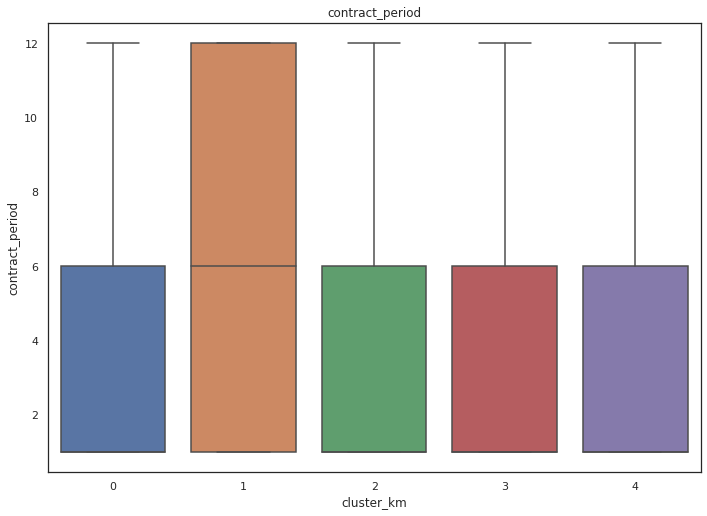

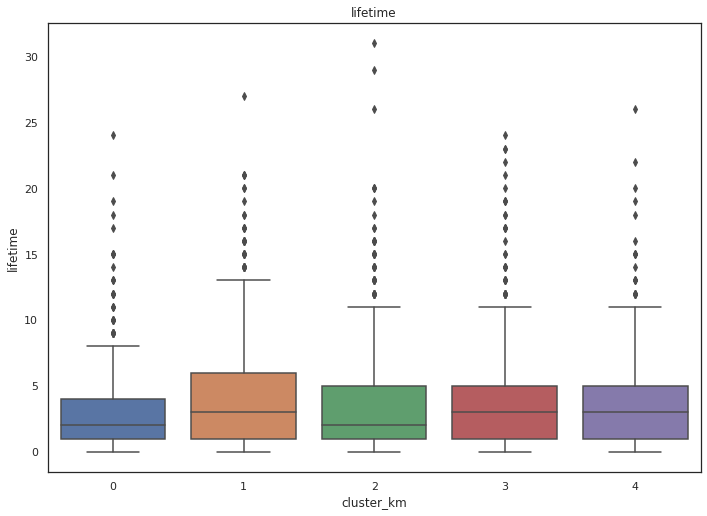

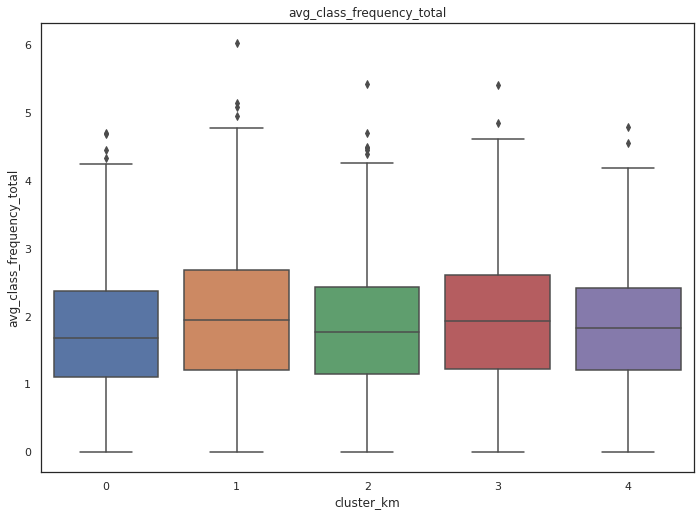

In [56]:
# построим боксплоты

for item in ('age', 'avg_additional_charges_total', 'contract_period', 'lifetime', 'avg_class_frequency_total'):
    sns.boxplot(x='cluster_km', y=item, data=gym_churn_new)
    plt.title(item)
    plt.show()

### Доля оттока для каждого кластера

In [57]:
# рассчитаем долю оттока для каждого кластера

#добавим вспомогательный столбец 
gym_churn_new["valid"] = 1

group_by_cluster_sum = gym_churn_new.groupby(['cluster_km']).sum()
group_by_cluster_sum

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,lifetime,avg_class_frequency_total,churn,valid
cluster_km,,,,,,,,,,,,,
0,280,0,274,43,561,1701,132,16113,77159.945292,1717,993.201585,224,561
1,513,1045,1003,937,1050,8044,481,31021,163654.499467,4600,2077.911141,127,1050
2,572,1132,270,67,1132,3192,0,32568,162310.679991,3785,2038.332176,432,1132
3,474,871,218,69,871,3944,871,25726,128985.429395,3276,1690.908676,175,871
4,202,333,182,118,0,1844,165,11309,55664.357092,1521,715.725273,103,386


In [58]:
# посчитаем долю оттока относительно количества клиентов в кластере

group_by_cluster_sum["churn"]/group_by_cluster_sum["valid"]

cluster_km
0    0.399287
1    0.120952
2    0.381625
3    0.200918
4    0.266839
dtype: float64

In [59]:
# посчитаем долю оттока относительно общего количества клиентов

group_by_cluster_sum["churn"]/group_by_cluster_sum["valid"].sum()

cluster_km
0    0.05600
1    0.03175
2    0.10800
3    0.04375
4    0.02575
Name: churn, dtype: float64

## Вывод

Стандартизировали данные.


Построили матрицу расстояний функцией linkage() на стандартизованной матрице признаков и нарисовали дендрограмму. На основании полученной дендрограммы предположим, что можно выделить четыре кластера.


Обучили модель кластеризации на основании алгоритма K-Means и спрогнозировали кластеры клиентов. За число кластеров приняли n=5 (по условию). Рассчитали метрику силуета Silhouette. Значение метрики оказалось не очень высоким Silhouette_score = 0.14


Посмотрели на средние значения признаков для кластеров. В соответствии с таблицей можно выделить первый и второй кластеры.


Построили распределения признаков для кластеров. Для логических построили столбчатые диаграммы, для непрерывных - боксплоты.


  - Для признака `gender`для всех кластеров распределенияч примерно одинковое. Выделяется первый кластер, там значений чуть меньше, чем в остальных, и третий кластер, в нем значений больше, чем остальных. 
  
  - Для признака `near_location` для кластеров 1, 3, 3 одинаковые значения, для кластера 4 значений меньше, а для 0 данные не отображаются. 
  
  - Для признака `partner` больше всего значений у кластера 1, меньше всего у кластера 2.
  
  - Для признака `promo_friends` распределение схоже с `partner` - больше всего значений у кластера 1, меньше всего у кластера 2.
  
  - Для признака `phone` одинковые значения для кластеров 0, 1, 2, 3, для 4 данные не отображаются.
  
  - Для признака `contract_period` диаграммы размаха для 0, 2, 3, 4 кластеров одинаковые, для кластера 1 значительно больше остальных.
  
  - Для признака `group_visits` больше всего значений для кластера 3, меньше всего - для кластера 0.
  
  - Для признака `age` диаграммы размаха для всех кластеров примерно одинаковые, в соответствии с графиками на уровне примерно 27-28 лет.
  
  - Для признака `avg_additional_charges_total` диаграммы размаха для всех кластеров примерно одинаковые.
  
  - Для признака `lifetime` диаграммы размаха для всех кластеров примерно одинаковые, выделяется кластер 1.
  
  - Для признаков `avg_class_frequency_total` диаграммы размаха для всех кластеров примерно одинаковые, выделяется кластер 1. 


Для каждого полученного кластера посчитали долю оттока. Добавили вспомогательный столбец, посчитали количество клиентов в каждом кластере.  

Посчитали долю оттока относительно количества клиентов в кластере. Кластеры отличаются по доле оттока. 
 - 0    0.399287
 - 1    0.120952
 - 2    0.381625
 - 3    0.200918
 - 4    0.266839

Дополнительно посчитали долю оттока относительно общего количества клиентов.
Кластеры 0, 2, 3, 4 склонны к оттоку. Кластер 1 более надежен.

## Общий Вывод

В рамках данного проекта необходимо было для сети фитнес-центров «Культурист-датасаентист» разработать стратегию взаимодействия с клиентами на основе аналитических данных, т.е. провести анализ и подготовить план действий по удержанию клиентов.

В качестве исходных данных Заказчиком были предоставлены данные, которые содержат данные на месяц до оттока и факт оттока на определённый месяц.

Исследование проводилось в несколько шагов.



<b>Исследовательский анализ данных</b>


Провели исследовательский анализ данных.


- Посмотрели на датасет: проверили, есть ли в нем отсутствующие признаки, изучили средние значения и стандартные отклонения. Cуммарное количество пропусков для столбцов равно нулю, пропущенных значений нет. Дубликаты в наборе данных отсутствуют. Данные отображаются корректно, подозрительных значений не наблюдается, правки не вносили. Тип данных не меняли. Рассмотрели все столбцы/признаки по отдельности. В каждом столбце по 4000 значений. Все признаки числовые.
 
 
  - Признак `gender` представлен в двух вариантах: 1 и 0:
    - Пол 1 = 2041
    - Пол 0 = 1959
    - Т.к. по количеству значений 1 превышает 0, предположим, что 1 - женский пол, 0 - мужской.
  
  
  - Признак `near_location` представлен в двух вариантах: 1 и 0:
    - Вариант проживания/работы 1 = 3381
    - Вариант проживания/работы 0 = 619
    - Считаем, что 1 - человек проживает или работает в районе, где находится фитнес-центр, 0 - человек проживает или работает НЕ в районе, где находится фитнес-центр. В соответвии со значениями больше людей, которые выбирают фитнес-клуб ближе к работе или месту проживания (что ожидаемо).
  
  
   - Признак `partner` представлен в двух вариантах: 1 и 0:
     - Вариант 0 = 2053
     - Вариант 1 = 1947
     - Считаем, что 1 - сотрудник компании-партнёра клуба, 0 - НЕ сотрудник компании-партнёра клуба. НЕ сотрудников компании-партнёра клуба больше, чем сотрудников.
  

  - Признак `promo_friends` представлен в двух вариантах: 1 и 0:
    - Вариант записи в рамках акции "Приведи друга" 0 = 2766
    - Вариант записи в рамках акции "Приведи друга" 1 = 1234
    - Считаем, что 1 - человек пришел по акции "Приведи друга", 0 - человек пришел не по акции "Приведи друга". Число значений для 1 меньше, чем для 0 почти в два раза, т.е. всё-таки люди приходят в основном не по акции "Приведи друга" (также ожидаемо, ведь спортзал - это про личную мотивацию в первую очередь).
  
  
   - Признак `phone` представлен в двух вариантах: 1 и 0:
     - Вариант записи телефона 1 = 3614
     - Вариант записи телефона 0 = 386
     - Считаем, что 1 - есть данные по номеру телефона, 0 - нет данных по номеру телефона. Число значений для 1 больше, чем для 0, т.е. в основном клиенты сообщают свой номер телефона при оформлении карты клуба.
   

   - Признак `contract_period` представлен в трёх вариантах: 
     - 1 месяц = 2207
     - 12 месяцев = 960
     - 6 месяцев = 833
     - Больше всего значений для длительности абонемента 1 месяц. По всей видимости, люди хотят сначала протестировать и не платить сразу за продолжительный период.


   - Признак `group_visits` представлен в двух вариантах: 
     - Вариант 0 = 2351
     - Вариант 1 = 1649
     - Считаем, что 1 - человек посещал групповые занятия, 0 - человек не посещал групповые занятия. Число значений для варианта 1 больше, чем для 0, т.е. люди не особо стремятся на групповые занятия.


   - Признак `age` представлен в нескольких вариантах. В соответствии с числовым описанием:
     - Максимальный возраст в наборе данных - 41 год
     - Минимальный возраст в наборе данных - 18 лет
     - Среднее значение 29 лет
     - Медианное значение - 29 лет
     - Число значений для медианного(и среднего) возраста 29 лет наибольшее, а для возраста 41 год - наименьшее.


   - Признак `avg_additional_charges_total` представлен в нескольких вариантах. В соответствии с числовым описанием:
     - Максимальная суммарная выручка от других услуг фитнес-центра = 552
     - Минимальная суммарная выручка от других услуг фитнес-центра = 0.14
     - Среднее значение суммарной выручки от других услуг фитнес-центра = 146
     - Медианное значение суммарной выручки от других услуг фитнес-центра = 136


   - Признак `month_to_end_contract` представлен в нескольких вариантах. В соответствии с числовым описанием:
     - Максимальный срок до окончания текущего действующего абонемента = 12 месяцев
     - Минимальный срок до окончания текущего действующего абонемента = 1 месяц
     - Средний срок до окончания текущего действующего абонемента = 4 месяца
     - Медианное значение срока до окончания текущего действующего абонемента = 1 месяц

 
  - Признак `lifetime` представлен в нескольких вариантах. В соответствии с числовым описанием:
    - Максимальное время с момента первого обращения в фитнес-центр = 31 месяц
    - Минимальное время с момента первого обращения в фитнес-центр = 0 месяцев
    - Среднее время с момента первого обращения в фитнес-центр = 3.7 месяцев
    - Медианное время с момента первого обращения в фитнес-центр = 3 месяца


  - Признак `avg_class_frequency_total` представлен в нескольких вариантах. В соответствии с числовым описанием:
    - Максимальная средняя частота посещений в неделю за все время с начала действия абонемента = 6
    - Минимальная средняя частота посещений в неделю за все время с начала действия абонемента = 0
    - Среднее значение частоты посещений в неделю за все время с начала действия абонемента срок до окончания текущего действующего абонемента = 1.87
    - Медианное значение частоты посещений в неделю за все время с начала действия абонемента срок до окончания текущего действующего абонемента = 1. 83


  - Признак `avg_class_frequency_current_month`представлен в нескольких вариантах. В соответствии с числовым описанием:
    - Максимальная средняя частота посещений в неделю за предыдущий месяц = 6.1
    - Минимальная средняя частота посещений в неделю за предыдущий месяц = 0
    - Среднее значение частоты посещений в неделю за предыдущий месяц = 1.76
    - Медианное значение частоты посещений в неделю за предыдущий месяц  = 1.71


  - Признак `churn` представлен в двух вариантах: 
    - Вариант 0 = 2939
    - Вариант 1 = 1061
    - Считаем, что 1 - отток произошел, 0 - человек продолжает посещать спортзал.
    - Число значений для варианта 0 больше, чем для 1, т.е. люди всё-таки продолжают в основном ходить в спортзал.


- Посмотрели на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался. Средние значения для тех, кто остался, превышают значения для тех, кто ушел.


- Построили столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток).

  - Для признака `gender`количество тех, кто ушел в отток, и для пола 0, и для пола 1 примерно одинаково. То есть отток от пола не зависит. 
  
  - Для признака `near_location` количество тех, кто ушел в отток, для варианта 1 превышает количество для варианта 0, но для варианта 0 и количество тех, кто остался, тоже невелико по сравнению с вариантом 1. То есть отток больше для варианта, когда клиент живет/работает НЕ рядом с клубом. 
  
  - Для признака `partner` отток НЕ сотрудников компании-партнёра клуба (вариант 0) больше, чем сотрудников.
  
  - Для признака `promo_friends` количество тех, кто ушел в отток, больше для варианта 0, но и значений для 0 больше. Люди приходят в основном не по акции "Приведи друга", но и отток при этом большой.
  
  - Для признака `phone` распределение похоже на `near_location`: количество тех, кто ушел в отток, для варианта 1 превышает количество для варианта 0, но и по количеству значений тех, кто остался, 1 значительно превышает 0. Т.е. среди тех, кто оставляет телефон (а их большинство) и отток тоже большой.
  
  - Для признака `contract_period` больше всего отток среди тех, кто брал абонемент на 1 месяц. А вот наименьший отток среди тех, кто берет абонемент на год, это самые стабильные клиенты.
  
  - Для признака `group_visits` отток среди тех, кто НЕ посещает групповые занятия больше, чем среди тех, кто посещает.
  
  - Для признака `age` распределения похожи на нормальные, и судя по графику, возраст тех, кто ушел в отток, в среднем около 27-28 лет.
  
  - Для признака `avg_additional_charges_total` распределения похожи между собой, но не похожи на нормальные. Суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон схожа и для тех, кто ушел в отток, и для тех, кто остался.
  
  - Для признака `month_to_end_contract` распределение похоже на `contract_period` (что ожидаемо), тк. чем больше период, тем больше срок до окончания, и тем меньше отток.
  
  - Для признака `lifetime` количество тех, кто ушел в отток значительно меньше тех, кто остался.
  
  - Для признаков `avg_class_frequency_total`и `avg_class_frequency_current_month` распределения схожи, количество тех, кто ушел в отток значительно меньше тех, кто остался. 


- Построили корреляционную матрицу числовых признаков набора данных. Визуализировали её методом heatmap(). Судя по матрице корреляции, нет признаков, которые коррелируют с целевой переменной более, чем на 0.9 по модулю. Зато есть две пары скоррелированных признаков: `contract_period` и `month_to_end_contract`(коэффициент корреляции 0.97) и `avg_class_frequency_total` и `avg_class_frequency_current_month` (коэффициент корреляции 0.95). Удалили по одному из пары коррелирующих признаков.



<b>Модель прогнозирования оттока клиентов</b>


Построили модель бинарной классификации клиентов.

Разбили данные на обучающую и валидационную выборку функцией train_test_split(). Обучили модель на train-выборке двумя способами: логистической регрессией, случайным лесом.

Оценили метрики accuracy, precision и recall, F1, ROC_AUC для обеих моделей на валидационной выборке. Сравнили по ним модели. Модель случайного леса показала себя лучше на основании метрик (за исключением ROC_AUC - для этой метрики показатель для модели логистической регрессии выше).

 - Метрики для модели логистической регрессии:
   - Accuracy: 0.88
   - Precision: 0.76
   - Recall: 0.77
   - F1: 0.77
   - ROC_AUC: 0.95
   
   
 - Метрики для модели случайного леса:
   - Accuracy: 0.89
   - Precision: 0.78
   - Recall: 0.77
   - F1: 0.78
   - ROC_AUC: 0.94
   

<b>Кластеризация клиентов</b>

Стандартизировали данные.


Построили матрицу расстояний функцией linkage() на стандартизованной матрице признаков и нарисовали дендрограмму. На основании полученной дендрограммы предположим, что можно выделить четыре кластера.


Обучили модель кластеризации на основании алгоритма K-Means и спрогнозировали кластеры клиентов. За число кластеров приняли n=5 (по условию). Рассчитали метрику силуета Silhouette. Значение метрики оказалось не очень высоким Silhouette_score = 0.14


Посмотрели на средние значения признаков для кластеров. В соответствии с таблицей можно выделить первый и второй кластеры.


Построили распределения признаков для кластеров.


   - Для признака `gender`для всех кластеров распределенияч примерно одинковое. Выделяется первый кластер, там значений чуть меньше, чем в остальных, и третий кластер, в нем значений больше, чем остальных. 
  
  - Для признака `near_location` для кластеров 1, 3, 3 одинаковые значения, для кластера 4 значений меньше, а для 0 данные не отображаются. 
  
  - Для признака `partner` больше всего значений у кластера 1, меньше всего у кластера 2.
  
  - Для признака `promo_friends` распределение схоже с `partner` - больше всего значений у кластера 1, меньше всего у кластера 2.
  
  - Для признака `phone` одинковые значения для кластеров 0, 1, 2, 3, для 4 данные не отображаются.
  
  - Для признака `contract_period` диаграммы размаха для 0, 2, 3, 4 кластеров одинаковые, для кластера 1 значительно больше остальных.
  
  - Для признака `group_visits` больше всего значений для кластера 3, меньше всего - для кластера 0.
  
  - Для признака `age` диаграммы размаха для всех кластеров примерно одинаковые, в соответствии с графиками на уровне примерно 27-28 лет.
  
  - Для признака `avg_additional_charges_total` диаграммы размаха для всех кластеров примерно одинаковые.
  
  - Для признака `lifetime` диаграммы размаха для всех кластеров примерно одинаковые, выделяется кластер 1.
  
  - Для признаков `avg_class_frequency_total` диаграммы размаха для всех кластеров примерно одинаковые, выделяется кластер 1. 


Для каждого полученного кластера посчитали долю оттока. Добавили вспомогательный столбец, посчитали количество клиентов в каждом кластере.  

Посчитали долю оттока относительно количества клиентов в кластере. Кластеры отличаются по доле оттока. 
 - 0    0.399287
 - 1    0.120952
 - 2    0.381625
 - 3    0.200918
 - 4    0.266839

Дополнительно посчитали долю оттока относительно общего количества клиентов.
Кластеры 0, 2, 3, 4 склонны к оттоку, т.е. данным кластерам необходимо уделить больше внимания в части взаимодействия с клиентами.

Рекомендации:

1. Уделить больше внимания работе с клиентами возраста 27-28 лет: проводить больше спортивных мероприятий, организовывать совместные забеги, набирать команду для участия во внешних спортивных мероприятиях (Гонка героев, например). Для этой возрастной группы такие активности могут быть интересны.

2. Развивать партнерскую сеть, делать скидки для партнеров.

3. Проводить акцию "Приведи друга" чаще.

4. Добавить в расписание групповых занятий. Например, групповые занятия с утра, чтобы люди могли прийти и позаниматься перед работой.